In [37]:
#import Tensorflow & Keras
import tensorflow as tf
from tensorflow import keras
print(keras.__version__)

2.4.0


## Using Keras to Load Dataset

In [38]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
#check the shape of X and Y
print(X_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


## Now create a validation set and convert pixels from 0 -1 by dividing by 255

In [40]:
X_train, X_val = X_train_full[:50000] / 255.0, X_train_full[50000:] / 255.0
y_train, y_val = y_train_full[:50000] , y_train_full[50000:] 

In [41]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [42]:
class_names[y_train[30000]]

'Dress'

## Create a Sequential Model

In [61]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),                                
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Check Weights & Bias of Hidden Layers

In [62]:
model.layers

In [63]:
weights, biases = model.layers[1].get_weights()

In [64]:
weights

array([[ 0.02922029,  0.01495183,  0.03576879, ...,  0.04925878,
        -0.05870818,  0.0413373 ],
       [-0.04708944,  0.04152618,  0.0272126 , ...,  0.03954289,
        -0.03630011, -0.01595871],
       [ 0.03267568,  0.02345794, -0.07410365, ..., -0.06793426,
        -0.00764026,  0.00225227],
       ...,
       [-0.05463772,  0.0650408 ,  0.00418828, ..., -0.03112742,
         0.02105004, -0.04860078],
       [ 0.01339529, -0.02133009, -0.03125754, ...,  0.064402  ,
        -0.04963522,  0.05238947],
       [-0.06763866,  0.030677  ,  0.03264583, ..., -0.02997273,
        -0.07249177,  0.07401814]], dtype=float32)

In [65]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compile the Model

In [66]:
optimizer = keras.optimizers.SGD(lr = 0.01)
model.compile(optimizer= optimizer, loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history =  model.fit(X_train,y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0007 - accuracy: 0.6844 - val_loss: 0.5307 - val_accuracy: 0.8200
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.8275 - val_loss: 0.4880 - val_accuracy: 0.8259
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4563 - accuracy: 0.8423 - val_loss: 0.4511 - val_accuracy: 0.8422
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4362 - accuracy: 0.8488 - val_loss: 0.4216 - val_accuracy: 0.8541
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4023 - accuracy: 0.8606 - val_loss: 0.4179 - val_accuracy: 0.8534
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3853 - accuracy: 0.8637 - val_loss: 0.4247 - val_accuracy: 0.8530
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3698 - accuracy: 0.8696 - val_loss: 0.3858 - val_accuracy:

## Plot Learning Curves

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


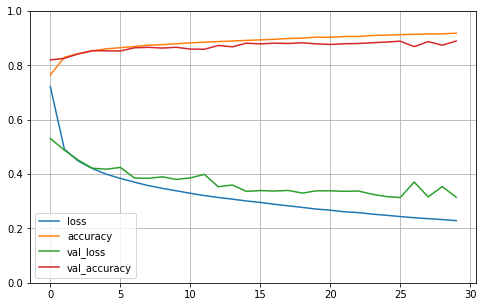

In [68]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [69]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 65.5059 - accuracy: 0.8476


[65.505859375, 0.847599983215332]

## Make Prediction

In [74]:
X_new = X_test[:3]

In [75]:
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [88]:
y_pred = model.predict(X_new)

In [89]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
import numpy as np

In [91]:
y_pred = model.predict_classes(X_new)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [92]:
y_pred

array([9, 2, 1])

In [93]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

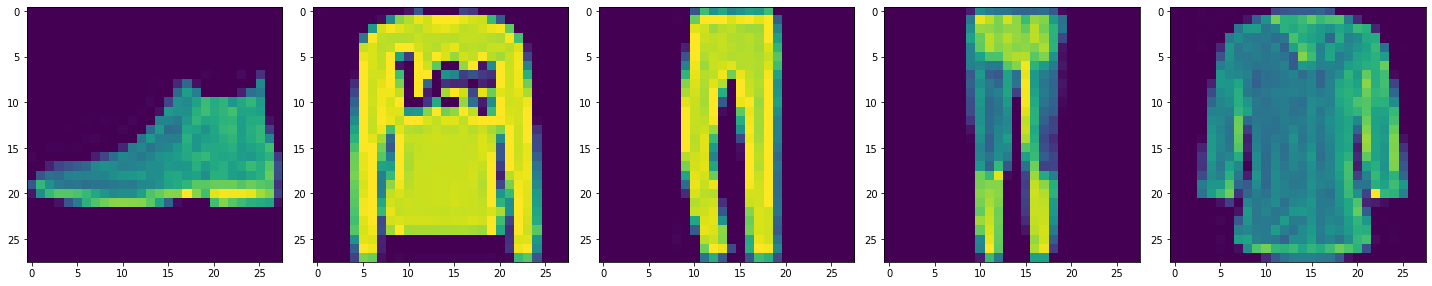

In [97]:
plotImages(X_test[:5])  # Plot images 0-4

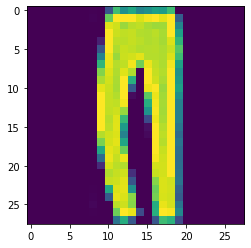

In [99]:
plt.imshow(X_test[2])